In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
dataset=pd.read_csv('D:\Data Science\Data Science\Data Trained\Assignments and Projects\SBI_Life_insurance.csv')

In [16]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [17]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [18]:
dataset.shape

(1338, 8)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


In [21]:
dataset[['age','sex','children','smoker','region','insuranceclaim']]=dataset[['age','sex','children','smoker','region','insuranceclaim']].astype('float64')

In [22]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19.0,0.0,27.900,0.0,1.0,3.0,16884.92400,1.0
1,18.0,1.0,33.770,1.0,0.0,2.0,1725.55230,1.0
2,28.0,1.0,33.000,3.0,0.0,2.0,4449.46200,0.0
3,33.0,1.0,22.705,0.0,0.0,1.0,21984.47061,0.0
4,32.0,1.0,28.880,0.0,0.0,1.0,3866.85520,1.0


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null float64
sex               1338 non-null float64
bmi               1338 non-null float64
children          1338 non-null float64
smoker            1338 non-null float64
region            1338 non-null float64
charges           1338 non-null float64
insuranceclaim    1338 non-null float64
dtypes: float64(8)
memory usage: 83.7 KB


In [24]:
dataset.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

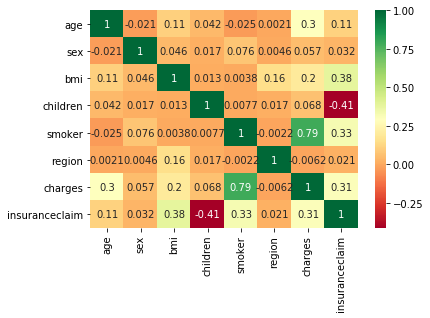

In [62]:
import seaborn as sns
sns.heatmap(dataset.corr(), cmap='RdYlGn', annot=True)

In [63]:
#We can see from the above heat map that sex and region are very low correlated with insurance claim, so we will drop these two columns

In [69]:
dataset=dataset.drop(['sex', 'region'], axis=1)

In [70]:
dataset.head()

,age,bmi,children,smoker,charges,insuranceclaim
0,19.0,27.900,0.0,1.0,16884.92400,1.0
1,18.0,33.770,1.0,0.0,1725.55230,1.0
2,28.0,33.000,3.0,0.0,4449.46200,0.0
3,33.0,22.705,0.0,0.0,21984.47061,0.0
4,32.0,28.880,0.0,0.0,3866.85520,1.0


In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
sc=StandardScaler()

In [83]:
dataset.iloc[:,[0,1,4]]=sc.fit_transform(dataset.iloc[:,[0,1,4]])

In [84]:
dataset.head()

,age,bmi,children,smoker,charges,insuranceclaim
0,-1.438764,-0.453320,0.0,1.0,0.298584,1.0
1,-1.509965,0.509621,1.0,0.0,-0.953689,1.0
2,-0.797954,0.383307,3.0,0.0,-0.728675,0.0
3,-0.441948,-1.305531,0.0,0.0,0.719843,0.0
4,-0.513149,-0.292556,0.0,0.0,-0.776802,1.0


In [86]:
X=dataset.iloc[:,:-1]

In [87]:
X.columns

Index(['age', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [88]:
y=dataset.iloc[:,-1]

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
log_reg=LogisticRegression()

In [97]:
log_reg.fit(X_train, y_train)

C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
y_pred=log_reg.predict(X_test)

In [101]:
round(log_reg.score(X_test, y_test)*100,2)

88.06

In [ ]:
# With 10 fold Cross Validation Score

In [120]:
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve,accuracy_score,auc

In [105]:
confusion_matrix(y_test, y_pred)

array([[ 93,  14],
       [ 18, 143]], dtype=int64)

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85       107
         1.0       0.91      0.89      0.90       161

    accuracy                           0.88       268
   macro avg       0.87      0.88      0.88       268
weighted avg       0.88      0.88      0.88       268



In [111]:
probs=log_reg.predict_proba(X_test)

In [117]:
preds=probs[:,1]

In [118]:
fpr, tpr, thresold=roc_curve(y_test,preds)

In [121]:
roc_auc = auc(fpr, tpr)

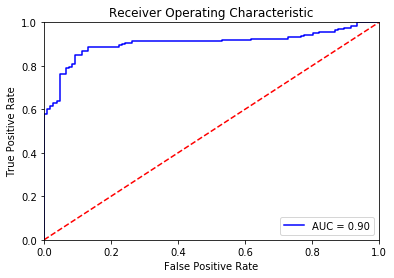

In [122]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [124]:
roc_auc_score(y_test,preds)

0.9043362164044813

In [125]:
from sklearn.model_selection import cross_val_score

In [126]:
cv_results=cross_val_score(log_reg,X_train, y_train,cv=10,scoring='roc_auc')

C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [128]:
round(cv_results.mean()*100,2)

92.7